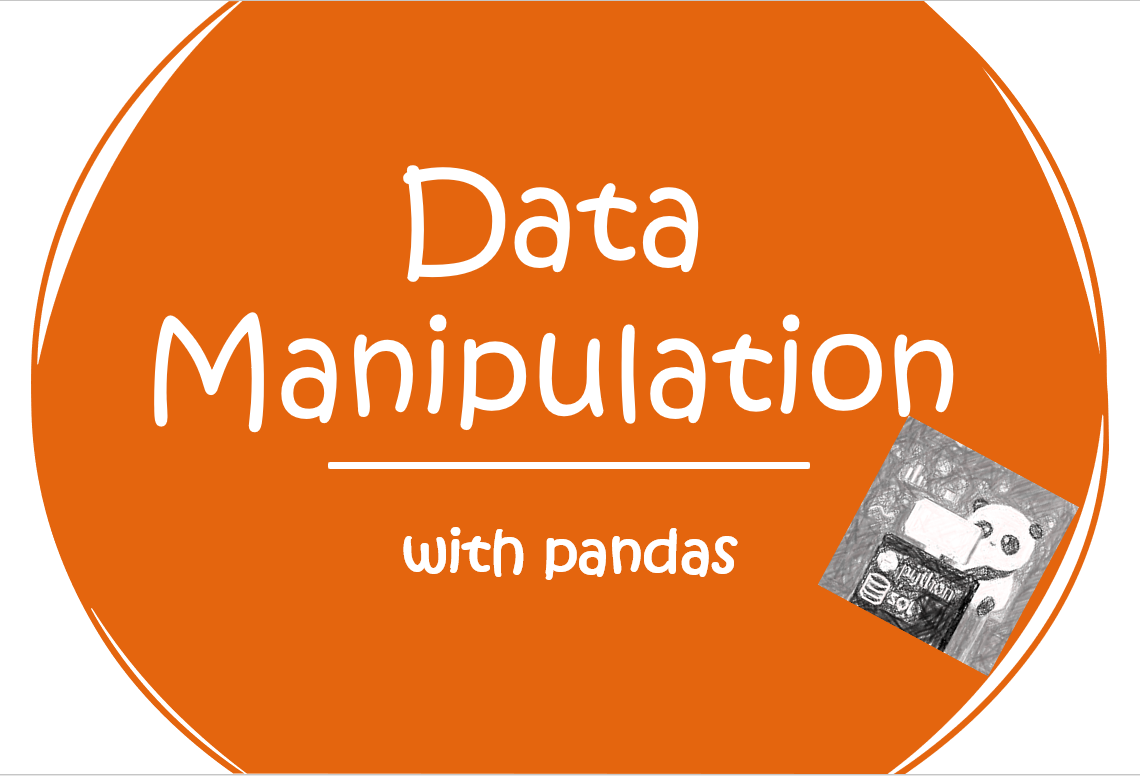

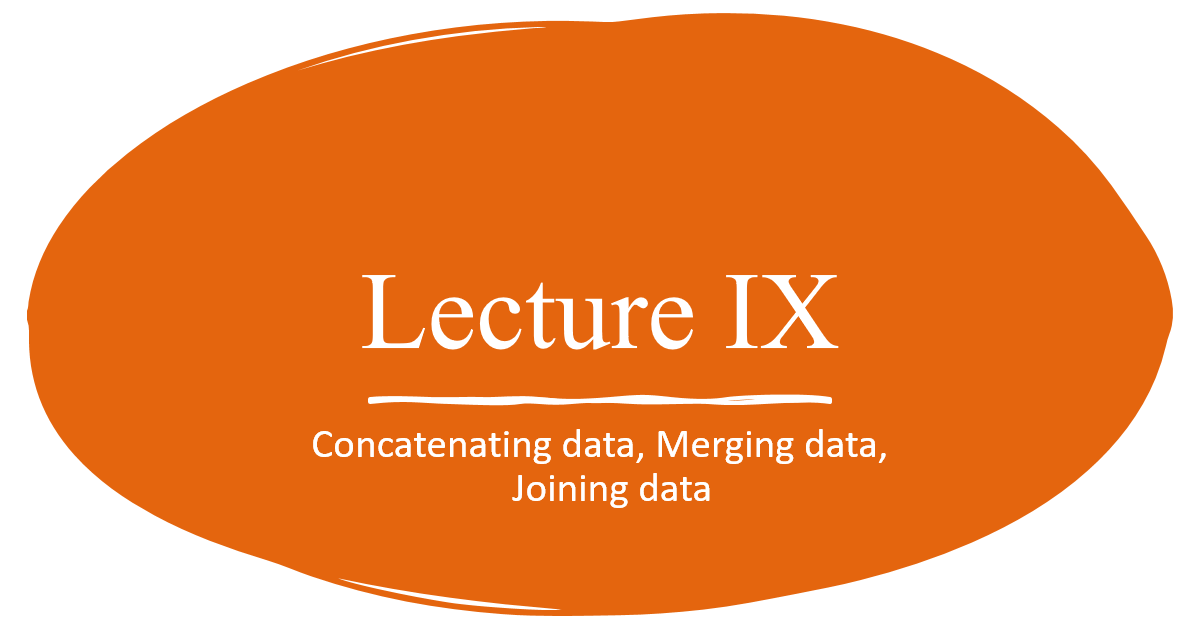

### <span style='background : Orange'> Import Libraries!</span>

In [2]:
import pandas as pd
import numpy as np

In [3]:
df1=pd.DataFrame([['John','CC',70],['Chris','CB',75],['Jack','AA',90]],columns=['name','grade','score'])
df2=pd.DataFrame([['Samanta','DD',55,'F'],['Ava','BA',85,'S'],['Joe','AA',95,'S']],columns=['name','grade','score','statement'])

In [4]:
display(df1,df2)

,name,grade,score
0,John,CC,70
1,Chris,CB,75
2,Jack,AA,90


,name,grade,score,statement
0,Samanta,DD,55,F
1,Ava,BA,85,S
2,Joe,AA,95,S


# <font color='Dark Orange'> LEARNING BASIC USES</font>

## <font color='Green'> 1) the use of append </font>

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
df1.append(df2) # the easiest use but no effective tools!

,name,grade,score,statement
0,John,CC,70,NaN
1,Chris,CB,75,NaN
2,Jack,AA,90,NaN
0,Samanta,DD,55,F
1,Ava,BA,85,S
2,Joe,AA,95,S


## <font color='Green'> 2) pd.concat() </font>

In [7]:
pd.concat([df1, df2],join='inner') ## inner: intersection

,name,grade,score
0,John,CC,70
1,Chris,CB,75
2,Jack,AA,90
0,Samanta,DD,55
1,Ava,BA,85
2,Joe,AA,95


In [8]:
pd.concat([df1, df2],join='outer') ## outer: union

,name,grade,score,statement
0,John,CC,70,NaN
1,Chris,CB,75,NaN
2,Jack,AA,90,NaN
0,Samanta,DD,55,F
1,Ava,BA,85,S
2,Joe,AA,95,S


In [10]:
pd.concat([df1, df2],join='outer',axis=1) ## axis:1---> horizontally 

,name,grade,score,name,grade,score,statement
0,John,CC,70,Samanta,DD,55,F
1,Chris,CB,75,Ava,BA,85,S
2,Jack,AA,90,Joe,AA,95,S


Note! The pd.concat() does not remove the duplications!
Let's rewrite df1 by containing one information from df2

In [11]:
df3 = pd.DataFrame([['John', 'CC', 70], ['Chris', 'CB', 75],['Ava', 'BA', 85], ['Jack', 'AA', 90]],
                   columns=['name', 'letter_grade', 'score'])
df3

,name,letter_grade,score
0,John,CC,70
1,Chris,CB,75
2,Ava,BA,85
3,Jack,AA,90


In [12]:
display(df2,df3)

,name,grade,score,statement
0,Samanta,DD,55,F
1,Ava,BA,85,S
2,Joe,AA,95,S


,name,letter_grade,score
0,John,CC,70
1,Chris,CB,75
2,Ava,BA,85
3,Jack,AA,90


In [16]:
pd.concat([df2, df3],join='inner') # innner is the insection of indexes od columns

,name,score
0,Samanta,55
1,Ava,85
2,Joe,95
0,John,70
1,Chris,75
2,Ava,85
3,Jack,90


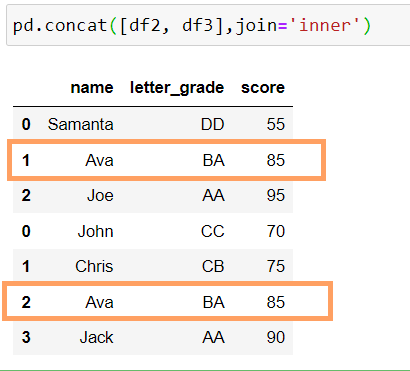

__CAUTION__ pd.concat() can NOT remove the duplication!

In [17]:
# If you wanna use the concat remove the duplication
pd.concat([df2, df3],join='inner').drop_duplicates()

,name,score
0,Samanta,55
1,Ava,85
2,Joe,95
0,John,70
1,Chris,75
3,Jack,90


In [19]:
#ignore the indexes:
pd.concat([df2, df3],join='inner',ignore_index=True)

,name,score
0,Samanta,55
1,Ava,85
2,Joe,95
3,John,70
4,Chris,75
5,Ava,85
6,Jack,90


In [21]:
pd.concat([df1, df2],join='inner')

,name,grade,score
0,John,CC,70
1,Chris,CB,75
2,Jack,AA,90
0,Samanta,DD,55
1,Ava,BA,85
2,Joe,AA,95


In [20]:
#The use of sort!
pd.concat([df1, df2],join='inner',ignore_index=True, sort=True) #sorting the column names

,grade,name,score
0,CC,John,70
1,CB,Chris,75
2,AA,Jack,90
3,DD,Samanta,55
4,BA,Ava,85
5,AA,Joe,95


In [22]:
# pd.concat(pd.Series)
S_1= pd.Series(['rose','lily','sunflower'])
S_2= pd.Series(['cat','dog','squirrel'])
S_3= pd.Series(['butternut','cucumber tree','pin cherry'])

In [23]:
pd.concat([S_1, S_2, S_3], axis=1, keys=["flowers", "animals", "trees"])

,flowers,animals,trees
0,rose,cat,butternut
1,lily,dog,cucumber tree
2,sunflower,squirrel,pin cherry


In [25]:
pd.concat([df1,df2], keys=["1st", "2nd"])

name grade  score statement
1st 0     John    CC     70       NaN
    1    Chris    CB     75       NaN
    2     Jack    AA     90       NaN
2nd 0  Samanta    DD     55         F
    1      Ava    BA     85         S
    2      Joe    AA     95         S

In [26]:
df1

,name,grade,score
0,John,CC,70
1,Chris,CB,75
2,Jack,AA,90


In [27]:
### SEE WHAT HAPPENS!
#appending a series to a dataframe via pd.concat()
S_4=pd.Series(['Emma', 'BB', 81])
pd.concat([df1,S_4])

,name,grade,score,0
0,John,CC,70.0,NaN
1,Chris,CB,75.0,NaN
2,Jack,AA,90.0,NaN
0,NaN,NaN,NaN,Emma
1,NaN,NaN,NaN,BB
2,NaN,NaN,NaN,81


In [28]:
#appending a series to a dataframe via pd.concat()
S_4=pd.Series(['Emma', 'BB', 81],index=['name','letter_grade','score'])

In [29]:
S_4

name            Emma
letter_grade      BB
score             81
dtype: object

In [32]:
S_4.to_frame().T # convert S_4 to dataframe qafter that take the transpose

,name,letter_grade,score
0,Emma,BB,81


In [33]:
# let's combine the df1 and S_4
result=pd.concat([df1, S_4.to_frame().T])
result

,name,grade,score,letter_grade
0,John,CC,70,NaN
1,Chris,CB,75,NaN
2,Jack,AA,90,NaN
0,Emma,NaN,81,BB


## <font color='Green'> 2) pd.merge() </font>

In [34]:
## recall df1,df2,df3
display(df1,df2,df3)

,name,grade,score
0,John,CC,70
1,Chris,CB,75
2,Jack,AA,90


,name,grade,score,statement
0,Samanta,DD,55,F
1,Ava,BA,85,S
2,Joe,AA,95,S


,name,letter_grade,score
0,John,CC,70
1,Chris,CB,75
2,Ava,BA,85
3,Jack,AA,90


In [35]:
pd.merge(df1, df2, on="name") # search for common name, how ='inner' default

,name,grade_x,score_x,grade_y,score_y,statement


In [36]:
pd.merge(df1, df3, on="name") # search for common name

,name,grade,score_x,letter_grade,score_y
0,John,CC,70,CC,70
1,Chris,CB,75,CB,75
2,Jack,AA,90,AA,90


In [ ]:
# It May be useful to see the same names with different answers!

In [37]:
df4 = pd.DataFrame([['product1',100],['product2',1400],['product3',500]],columns=['Product_name','price'])
df5 = pd.DataFrame([['product1',90],['product2',1600],['product4',700]],columns=['Product_name','price'])

In [38]:
display(df4,df5)

,Product_name,price
0,product1,100
1,product2,1400
2,product3,500


,Product_name,price
0,product1,90
1,product2,1600
2,product4,700


In [41]:
pd.merge(df4, df5, how="outer", on=["Product_name"]) #union! (outer) by combinig all info 

,Product_name,price_x,price_y
0,product1,100.0,90.0
1,product2,1400.0,1600.0
2,product3,500.0,NaN
3,product4,NaN,700.0


In [43]:
#see the difference between merge & concat
display(pd.concat([df4, df5], join="outer")) #union! (outer)
display(pd.concat([df4, df5], join="outer", keys=["Product_name"])) #union! (outer)

,Product_name,price
0,product1,100
1,product2,1400
2,product3,500
0,product1,90
1,product2,1600
2,product4,700


Product_name  price
Product_name 0     product1    100
             1     product2   1400
             2     product3    500

In [44]:
pd.merge(df4, df5, how="inner", on=["Product_name"]) #intersection (inner)

,Product_name,price_x,price_y
0,product1,100,90
1,product2,1400,1600


In [46]:
pd.merge(df4, df5, how="outer", on=["Product_name",'price']) #union! (outer) == pd.concat()

,Product_name,price
0,product1,100
1,product2,1400
2,product3,500
3,product1,90
4,product2,1600
5,product4,700


In [47]:
# See what happens whe how='inner'
# Try to see suffix use!
pd.merge(df4, df5, how="outer", on=["Product_name"], suffixes = ('_firm1', '_firm2')) #union! (outer)

,Product_name,price_firm1,price_firm2
0,product1,100.0,90.0
1,product2,1400.0,1600.0
2,product3,500.0,NaN
3,product4,NaN,700.0


In [48]:
pd.merge(df4, df5, how="left", on=["Product_name"], suffixes = ('_firm1', '_firm2'))
#the first defined dataframe has been focused on! (outer)

,Product_name,price_firm1,price_firm2
0,product1,100,90.0
1,product2,1400,1600.0
2,product3,500,NaN


In [49]:
## What about CROSS!!!!
pd.merge(df4, df5, how="cross", suffixes = ('_firm1', '_firm2'))

,Product_name_firm1,price_firm1,Product_name_firm2,price_firm2
0,product1,100,product1,90
1,product1,100,product2,1600
2,product1,100,product4,700
3,product2,1400,product1,90
4,product2,1400,product2,1600
5,product2,1400,product4,700
6,product3,500,product1,90
7,product3,500,product2,1600
8,product3,500,product4,700


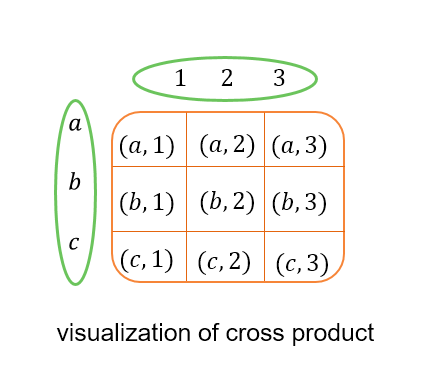

<div class="alert alert-block alert-info">
<b>NOTE:</b> You can merge a mult-indexed Series and a DataFrame, if the names of the MultiIndex correspond to the columns from the DataFrame. Transform the Series to a DataFrame using Series.reset_index() before merging,
</div> 

In [50]:
multi_index=pd.Series([96,87,65,75,23,86],
                     index=pd.MultiIndex.from_arrays(
                     [['John','Clark','Sue']*2,['AA','BA','CC','CB','FF','BA']],names=['Name','Grade']))

In [51]:
multi_index

Name   Grade
John   AA       96
Clark  BA       87
Sue    CC       65
John   CB       75
Clark  FF       23
Sue    BA       86
dtype: int64

In [52]:
single=pd.DataFrame({'Name':['John','Clark','Sue'],'Grade':['AA','BA','CC']})
single

,Name,Grade
0,John,AA
1,Clark,BA
2,Sue,CC


In [53]:
## SEE WHAT HAPPENS
pd.merge(single,multi_index,on=['Name','Grade'])

ValueError: Cannot merge a Series without a name

In [54]:
# Resolve it!:
pd.merge(single,multi_index.reset_index(),on=['Name','Grade'])

,Name,Grade,0
0,John,AA,96
1,Clark,BA,87
2,Sue,CC,65


<div class="alert alert-block alert-danger">
<b>WARNING!</b> Joining / merging on duplicate keys can cause a returned frame that is the multiplication of the row dimensions, which may result in memory overflow. It is the user’ s responsibility to manage duplicate values in keys before joining large DataFrames.
</div>

### <font color='Dark Orange'> Note </font>


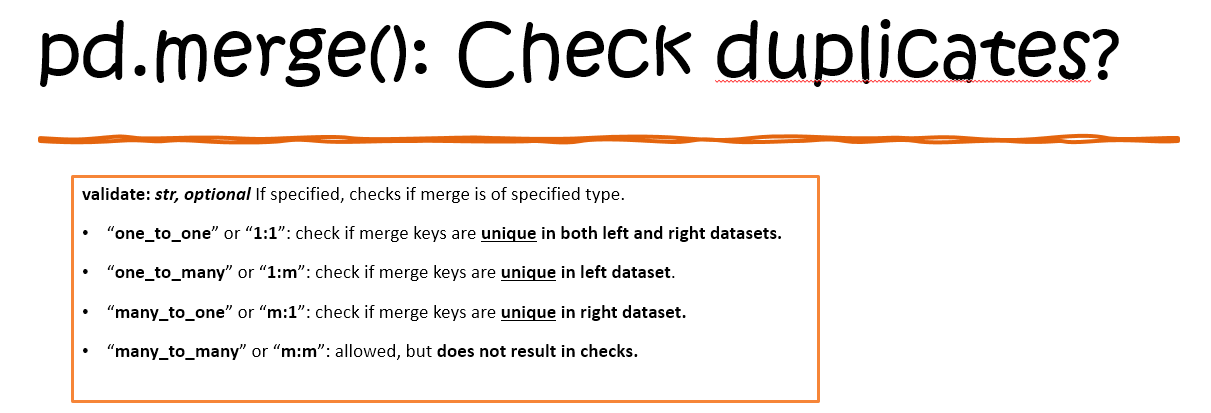

In [55]:
ndf1 = pd.DataFrame({'K':[1,2],'P':[2,2]})
ndf2 = pd.DataFrame({'K':[4,5,6],'P':[2,2,2]})

In [56]:
display(ndf1,ndf2)

,K,P
0,1,2
1,2,2


,K,P
0,4,2
1,5,2
2,6,2


In [57]:
# when you merge these dataframes:
pd.merge(ndf1,ndf2,on='P', how='outer')

,K_x,P,K_y
0,1,2,4
1,1,2,5
2,1,2,6
3,2,2,4
4,2,2,5
5,2,2,6


In [58]:
# See what happens!
pd.merge(ndf1,ndf2, on='P', how='outer', validate='one_to_many')
#since the keys are not unique

MergeError: Merge keys are not unique in left dataset; not a one-to-many merge

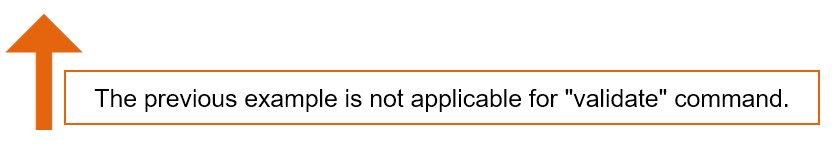

In [59]:
# What if
ndf1 = pd.DataFrame({'K':[1,2],'P':[1,2]})
ndf2 = pd.DataFrame({'K':[4,5,6],'P':[2,2,2]})
display(ndf1,ndf2)

,K,P
0,1,1
1,2,2


,K,P
0,4,2
1,5,2
2,6,2


In [60]:
# Since the left keys are unique it must be one_to_many
pd.merge(ndf1,ndf2,on='P', how='outer', validate='one_to_many')
#since the keys are not unique

,K_x,P,K_y
0,1,1,NaN
1,2,2,4.0
2,2,2,5.0
3,2,2,6.0


## <font color='Green'> 3) pd.join() </font>

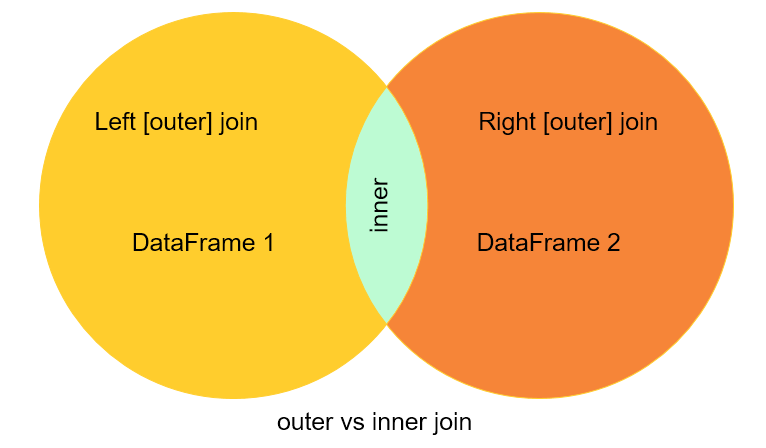

In [64]:
df11 = pd.DataFrame({
    'A':['A0','A1','A2','A3'],
    'B':['B0','B1','B2','B3'],
    'K':['K0','K1','K0','K1']
},index=['K0','K1','K2','K3'])

df22 = pd.DataFrame({
    'C':['C0','C1'],
    'D':['D0','D1']
},index=['K0','K1'])

In [65]:
display(df11,df22)

,A,B,K
K0,A0,B0,K0
K1,A1,B1,K1
K2,A2,B2,K0
K3,A3,B3,K1


,C,D
K0,C0,D0
K1,C1,D1


In [66]:
display(df11.join(df22, how="outer"),df11.join(df22, how="inner"))

,A,B,K,C,D
K0,A0,B0,K0,C0,D0
K1,A1,B1,K1,C1,D1
K2,A2,B2,K0,NaN,NaN
K3,A3,B3,K1,NaN,NaN


,A,B,K,C,D
K0,A0,B0,K0,C0,D0
K1,A1,B1,K1,C1,D1


<div class="alert alert-block alert-success">
<b>A REAL EXAMPLE</b> Discuss the population density of states in USA (rank US states and territories by their 2010 population density.)
</div>

In [67]:
pop=pd.read_csv('state-population.csv')
areas=pd.read_csv('state-areas.csv')
abbrv=pd.read_csv('state-abbrevs.csv')

In [70]:
display('pop.head()',pop.head())
display( 'areas.head()', areas.head())
display('abbrv.head()',abbrv.head())

'pop.head()'

,state/region,ages,year,population
0,AL,under18,2012,1117489.0
1,AL,total,2012,4817528.0
2,AL,under18,2010,1130966.0
3,AL,total,2010,4785570.0
4,AL,under18,2011,1125763.0


'areas.head()'

,state,area (sq. mi)
0,Alabama,52423
1,Alaska,656425
2,Arizona,114006
3,Arkansas,53182
4,California,163707


'abbrv.head()'

,state,abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [71]:
merged = pd.merge(pop, abbrv, how='outer',
                  left_on ='state/region', right_on='abbreviation')
merged.head()

,state/region,ages,year,population,state,abbreviation
0,AL,under18,2012,1117489.0,Alabama,AL
1,AL,total,2012,4817528.0,Alabama,AL
2,AL,under18,2010,1130966.0,Alabama,AL
3,AL,total,2010,4785570.0,Alabama,AL
4,AL,under18,2011,1125763.0,Alabama,AL


In [72]:
merged = merged.drop(['abbreviation'], 1) # drop duplicate info

In [73]:
merged.head()

,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama


In [74]:
merged.shape

(2544, 5)

In [75]:
# it is not expected to get duplication but
# Check the duplicated rows if any
merged[merged.duplicated()==True]

,state/region,ages,year,population,state


In [76]:
merged.isnull().sum()

state/region     0
ages             0
year             0
population      20
state           96
dtype: int64

In [77]:
# to figure out these null values
merged[merged['population'].isnull()]

,state/region,ages,year,population,state
2448,PR,under18,1990,NaN,NaN
2449,PR,total,1990,NaN,NaN
2450,PR,total,1991,NaN,NaN
2451,PR,under18,1991,NaN,NaN
2452,PR,total,1993,NaN,NaN
2453,PR,under18,1993,NaN,NaN
2454,PR,under18,1992,NaN,NaN
2455,PR,total,1992,NaN,NaN
2456,PR,under18,1994,NaN,NaN
2457,PR,total,1994,NaN,NaN


In [78]:
# to figure out these null values
merged[(merged['state/region']=='PR') & (merged['year']>1999)]

,state/region,ages,year,population,state
2468,PR,total,2000,3810605.0,NaN
2469,PR,under18,2000,1089063.0,NaN
2470,PR,total,2001,3818774.0,NaN
2471,PR,under18,2001,1077566.0,NaN
2472,PR,total,2002,3823701.0,NaN
2473,PR,under18,2002,1065051.0,NaN
2474,PR,total,2004,3826878.0,NaN
2475,PR,under18,2004,1035919.0,NaN
2476,PR,total,2003,3826095.0,NaN
2477,PR,under18,2003,1050615.0,NaN


In [79]:
# to figure out which states are null:
merged[merged['state'].isnull()]['state/region'].unique()

array(['PR', 'USA'], dtype=object)

In [81]:
merged.loc[merged['state/region'] == 'PR', 'state'] = 'Puerto Rico'
merged.loc[merged['state/region'] == 'USA', 'state'] = 'United States'
merged.isnull().sum()

state/region     0
ages             0
year             0
population      20
state            0
dtype: int64

***
***

### New strategy for Imputing NA values:) 

In [82]:
df=merged[(merged['year']>=2000) & (merged['state/region']=='PR')]
df.set_index('year',inplace=True)

df_18=df[df['ages']=='under18']
df_18.head()

,state/region,ages,population,state
year,,,,
2000,PR,under18,1089063.0,Puerto Rico
2001,PR,under18,1077566.0,Puerto Rico
2002,PR,under18,1065051.0,Puerto Rico
2004,PR,under18,1035919.0,Puerto Rico
2003,PR,under18,1050615.0,Puerto Rico


In [83]:
df_tot=df[df['ages']=='total']
df_tot.head()

,state/region,ages,population,state
year,,,,
2000,PR,total,3810605.0,Puerto Rico
2001,PR,total,3818774.0,Puerto Rico
2002,PR,total,3823701.0,Puerto Rico
2004,PR,total,3826878.0,Puerto Rico
2003,PR,total,3826095.0,Puerto Rico


Text(0.5, 1.0, 'total')

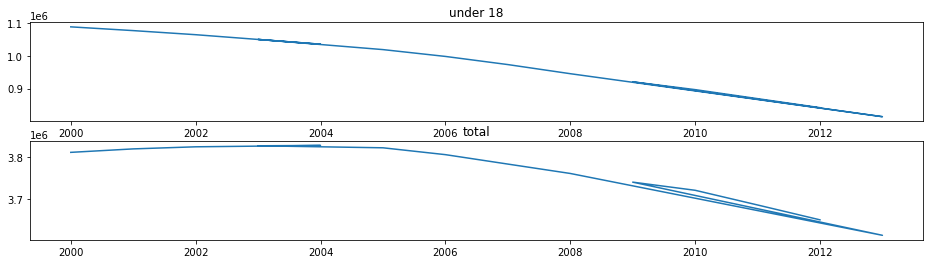

In [84]:
# WAY 1: to find some similar regions by filling the na values of with appropriate strategy
# WAY 2: inter/extrapolation
import matplotlib.pyplot as plt
plt.figure(figsize=(16,4))
plt.subplot(2,1,1)
plt.plot(df_18.index,df_18.population.values)
plt.title('under 18')

plt.subplot(2,1,2)
plt.plot(df_tot.index,df_tot.population.values)
plt.title('total')

> __Interpolation/Extrapolation Techniques__


In [85]:
import scipy.interpolate as spi
intfunc = spi.interp1d(df_18.index,df_18.population.values,fill_value='extrapolate') 
y_int_18= intfunc(np.arange(1990,2000,1))
y_int_18
# spline: if there no simple pattern
# cubic: 
# nearest

array([1204033., 1192536., 1181039., 1169542., 1158045., 1146548.,
       1135051., 1123554., 1112057., 1100560.])

In [86]:
total_int = spi.interp1d(df_tot.index, df_tot.population.values,fill_value="extrapolate")
total_est = total_int(np.arange(1990,2000,1))

display(total_est)

array([3728915., 3737084., 3745253., 3753422., 3761591., 3769760.,
       3777929., 3786098., 3794267., 3802436.])

In [88]:
indeces=merged[(merged['year']<2000) & (merged['state/region']=='PR') &(merged['ages']=='under18')].index
merged.loc[indeces,'population']=y_int_18
indeces_tot=merged[(merged['year']<2000) & (merged['state/region']=='PR') &(merged['ages']=='total')].index
merged.loc[indeces_tot,'population']=total_est

merged[(merged['state/region']=='PR')]

,state/region,ages,year,population,state
2448,PR,under18,1990,1204033.0,Puerto Rico
2449,PR,total,1990,3728915.0,Puerto Rico
2450,PR,total,1991,3737084.0,Puerto Rico
2451,PR,under18,1991,1192536.0,Puerto Rico
2452,PR,total,1993,3745253.0,Puerto Rico
2453,PR,under18,1993,1181039.0,Puerto Rico
2454,PR,under18,1992,1169542.0,Puerto Rico
2455,PR,total,1992,3753422.0,Puerto Rico
2456,PR,under18,1994,1158045.0,Puerto Rico
2457,PR,total,1994,3761591.0,Puerto Rico


In [89]:
merged.isnull().sum()

state/region    0
ages            0
year            0
population      0
state           0
dtype: int64

In [90]:
merged['year'].unique()

array([2012, 2010, 2011, 2009, 2013, 2007, 2008, 2005, 2006, 2004, 2003,
       2001, 2002, 1999, 2000, 1998, 1997, 1996, 1995, 1994, 1993, 1992,
       1991, 1990], dtype=int64)

***
***
***

In [ ]:
# Let's merge with areas

In [93]:
merged.head()

,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama


In [92]:
areas.head()

,state,area (sq. mi)
0,Alabama,52423
1,Alaska,656425
2,Arizona,114006
3,Arkansas,53182
4,California,163707


In [94]:
final = pd.merge(merged, areas, on='state', how='left')
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [96]:
#Again, let's check for nulls to see if there were any mismatches:
display(final.isnull().sum())

state/region      0
ages              0
year              0
population        0
state             0
area (sq. mi)    48
dtype: int64

In [97]:
# for ease of use
final.rename(columns = {'area (sq. mi)':'area'},inplace=True)

In [99]:
final[final['area'].isnull()]['state'].unique()

array(['United States'], dtype=object)

In [100]:
final.dropna(inplace=True) # can be negligible # of null: 48/ the shape is 2544
final.head()

# We could insert the appropriate value (using the sum of all state areas, for instance)

,state/region,ages,year,population,state,area
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


> __DO NOT FORGET THE SCENARIO:) 2010 population density.__

In [101]:
data2010 = final.query("year == 2010 & ages == 'total'")
data2010.head()

,state/region,ages,year,population,state,area
3,AL,total,2010,4785570.0,Alabama,52423.0
91,AK,total,2010,713868.0,Alaska,656425.0
101,AZ,total,2010,6408790.0,Arizona,114006.0
189,AR,total,2010,2922280.0,Arkansas,53182.0
197,CA,total,2010,37333601.0,California,163707.0


In [102]:
data2010.set_index('state', inplace=True)
density = data2010['population'] / data2010['area']

In [104]:
density

state
Alabama                   91.287603
Alaska                     1.087509
Arizona                   56.214497
Arkansas                  54.948667
California               228.051342
Colorado                  48.493718
Connecticut              645.600649
Delaware                 460.445752
District of Columbia    8898.897059
Florida                  286.597129
Georgia                  163.409902
Hawaii                   124.746707
Idaho                     18.794338
Illinois                 221.687472
Indiana                  178.197831
Iowa                      54.202751
Kansas                    34.745266
Kentucky                 107.586994
Louisiana                 87.676099
Maine                     37.509990
Maryland                 466.445797
Massachusetts            621.815538
Michigan                 102.015794
Minnesota                 61.078373
Mississippi               61.321530
Missouri                  86.015622
Montana                    6.736171
Nebraska              

In [103]:
data2010.head()

,state/region,ages,year,population,area
state,,,,,
Alabama,AL,total,2010,4785570.0,52423.0
Alaska,AK,total,2010,713868.0,656425.0
Arizona,AZ,total,2010,6408790.0,114006.0
Arkansas,AR,total,2010,2922280.0,53182.0
California,CA,total,2010,37333601.0,163707.0


In [105]:
density.sort_values(ascending=False, inplace=True)
density.head()

state
District of Columbia    8898.897059
Puerto Rico             1058.665149
New Jersey              1009.253268
Rhode Island             681.339159
Connecticut              645.600649
dtype: float64

The result is a ranking of US states plus Washington, DC, and Puerto Rico in order of their 2010 population density, in residents per square mile. We can see that by far the densest region in this dataset is Washington, DC (i.e., the District of Columbia); among states, the densest is New Jersey.

In [106]:
density.tail()

state
South Dakota    10.583512
North Dakota     9.537565
Montana          6.736171
Wyoming          5.768079
Alaska           1.087509
dtype: float64